# SDSC2001 Course Project

Student Name: Ryan Judistira Gani

SID: 56325747

## Module 1: Data Exploration

First we import the required libraries, then we load the dataset `creditcard_train.csv` as a Pandas DataFrame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

df = pd.read_csv('creditcard_train.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
print("The dataset contains {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataset contains 284657 rows and 31 columns


In [3]:
print(df.describe())

                Time             V1             V2             V3  \
count  284657.000000  284657.000000  284657.000000  284657.000000   
mean    94820.043168       0.000942      -0.000761       0.001280   
std     47486.331846       1.955946       1.649907       1.510265   
min         0.000000     -56.407510     -72.715728     -48.325590   
25%     54208.000000      -0.920083      -0.598696      -0.889759   
50%     84704.000000       0.018393       0.065213       0.179930   
75%    139324.000000       1.315753       0.803360       1.027294   
max    172792.000000       2.454930      22.057730       9.382558   

                  V4             V5             V6             V7  \
count  284657.000000  284657.000000  284657.000000  284657.000000   
mean       -0.000844       0.000591       0.000233       0.000956   
std         1.413999       1.378060       1.332089       1.230796   
min        -5.683171    -113.743300     -26.160506     -43.557240   
25%        -0.848833      -0.6914

In [4]:
print('The dataset shows {} fraud transactions out of {} records'.format(df[df['Class'] == 1].shape[0],df.shape[0]))

The dataset shows 442 fraud transactions out of 284657 records


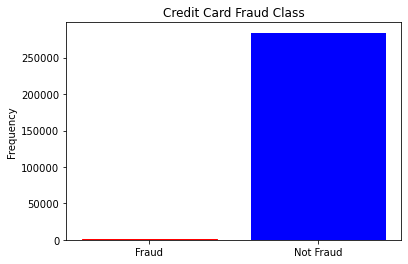

In [5]:
fraud=[df[df['Class']==1].shape[0],df[df['Class']==0].shape[0]]
plt.figure()
bar=plt.bar(['Fraud','Not Fraud'],fraud,color='b')
plt.ylabel('Frequency')
plt.title('Credit Card Fraud Class')
bar[0].set_color('r')

#### Missing values
We are going to check if the dataset contains any missing values

In [6]:
print('There are {} records with missing values'.format(sum(df.isnull().values.any(axis=1))))

There are 798 records with missing values


In [7]:
df.isnull().sum()

Time        0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22       278
V23       520
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class       0
dtype: int64

In [8]:
null_total=pd.DataFrame({'Null Values':df.isnull().sum()})
print(null_total)
df=df.dropna()
print('\nThere are',df.shape[0],'observations to be analyzed further.')
print(df['Class'].value_counts())

        Null Values
Time              0
V1                0
V2                0
V3                0
V4                0
V5                0
V6                0
V7                0
V8                0
V9                0
V10               0
V11               0
V12               0
V13               0
V14               0
V15               0
V16               0
V17               0
V18               0
V19               0
V20               0
V21               0
V22             278
V23             520
V24               0
V25               0
V26               0
V27               0
V28               0
Amount            0
Class             0

There are 283859 observations to be analyzed further.
0    283417
1       442
Name: Class, dtype: int64


We can observe that there are 278 missing values in V22 and 520 missing values in V23. The total number of rows with missing values is 798. 798 observations will not affect significantly to the total observations of 284,657 rows, as it is relatively small compared to the big size of the dataset. Hence, we will proceed with dropping the null values.

In [9]:
print('The dataset shows {} fraud transactions out of {} records'.format(df[df['Class'] == 1].shape[0],df.shape[0]))

The dataset shows 442 fraud transactions out of 283859 records


Records with missing values do not have a case of fraud transaction. Therefore, dropping them was a good decision

##### Removing the outliers

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
copy = df.copy()
fraud = pd.DataFrame(df.Class)
copy = copy.drop(columns = ['Class'])
copy = copy[~((copy<(Q1-2.5*IQR))|(copy>(Q3+2.5*IQR))).any(axis = 1)]
copy = pd.concat([copy,fraud],axis = 1)
copy = copy.dropna()

print("If the outliers are removed, we would remove {}% or {} samples from the dataset and the shape of the dataset would look like".format(round((df.shape[0] - copy.shape[0])/df.shape[0]*100),
                                                            df.shape[0] - copy.shape[0]), copy.shape )
print(copy['Class'].value_counts())

If the outliers are removed, we would remove 25% or 71306 samples from the dataset and the shape of the dataset would look like (212553, 31)
0    212522
1        31
Name: Class, dtype: int64


We can see that if we were to remove the outliers, the number of observation would decrease by around 25% or to be exact, 71,306 observations. From these observations, many of them includes cases of fraud transaction. Since we already have a highly unbalanced data , it is unwise to delete the observations with outliers. Therefore, we decided that the outliers would not be removed.

## Module 2: Data Visualization

##### Transactions by Time feature
Look for how 2 class cases are distributed - Fraud and Not Fraud, by time. 

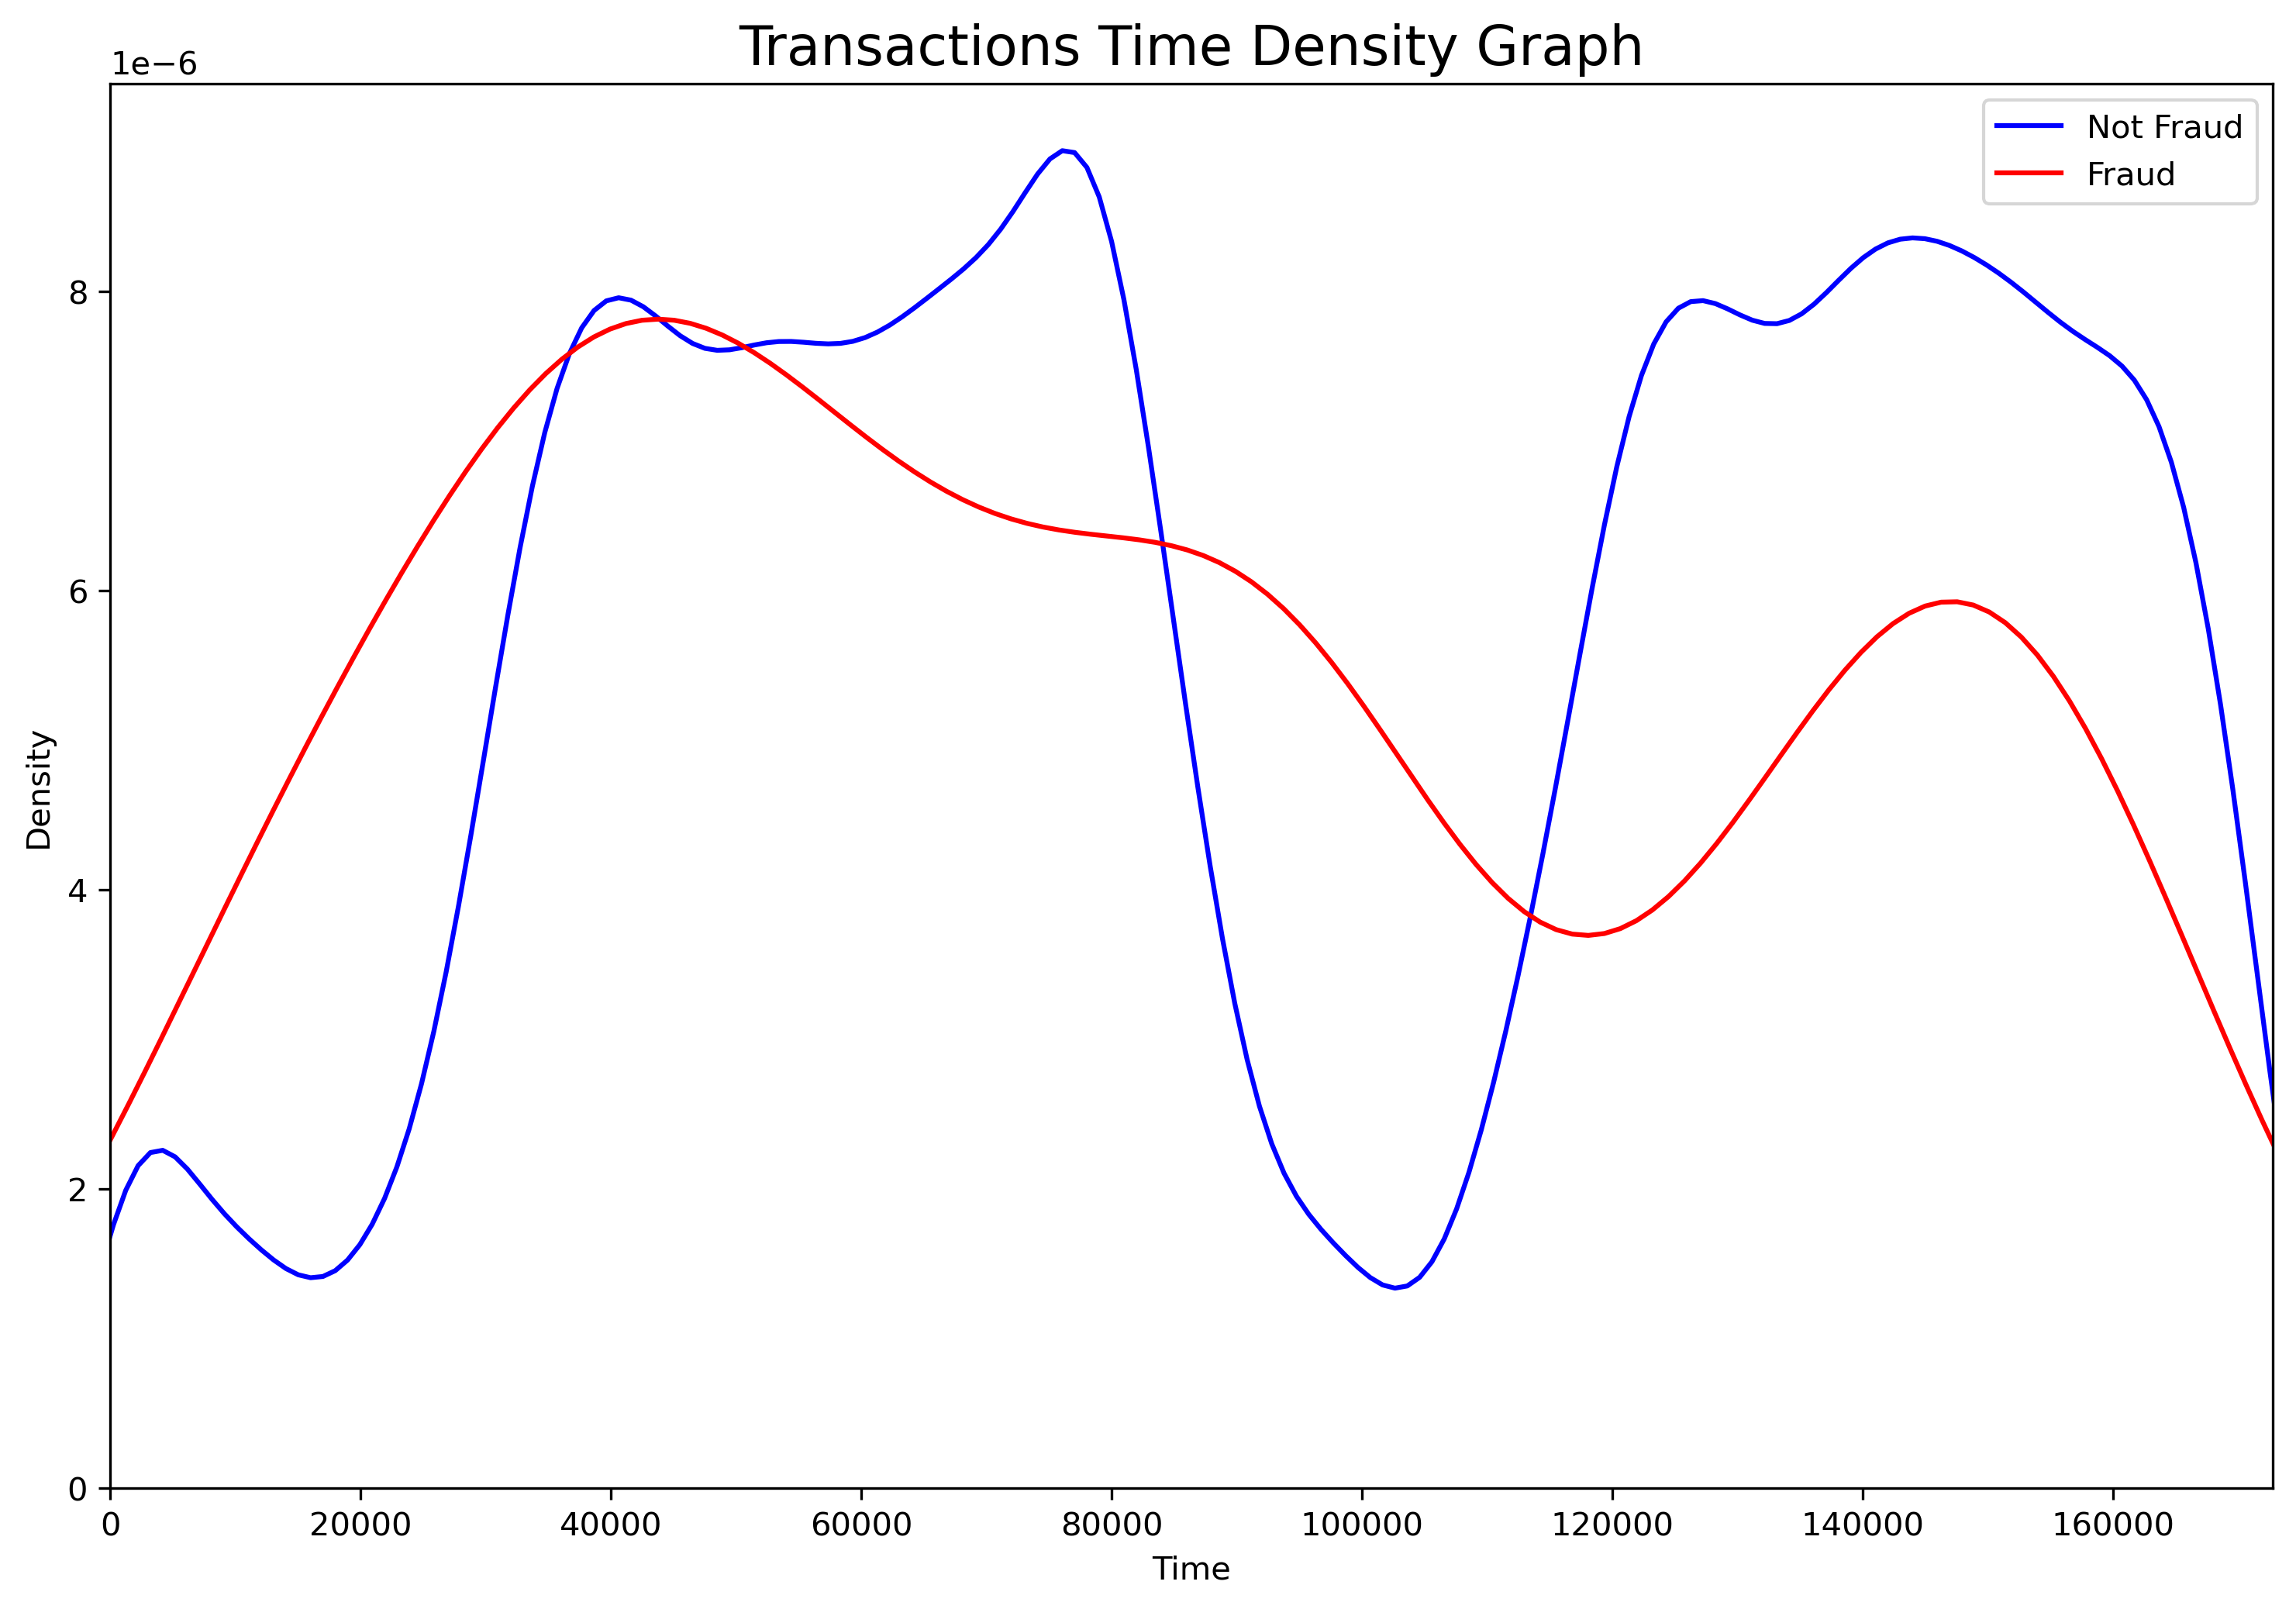

In [11]:
plt.figure(figsize=(12,8), dpi = 300)
df_y=pd.DataFrame(df['Class'])
df_x=df.drop(columns=['Class'])
sns.distplot(df[df['Class'] == 0]["Time"], color='b',hist = False, label = 'Not Fraud');
sns.distplot(df[df['Class'] == 1]["Time"], color='r',hist = False, label = 'Fraud');
plt.xlim([0,df['Time'].max()])
plt.title('Transactions Time Density Graph', fontsize=17)
plt.legend()
plt.show()

Both Fraudulent and Not Fraudulent transactions have relatively equal distributions in time. We see that the Fraud cases is distributed in a more plain manner, while Not Fraud cases have flactuations, especially the significant drop at around 100000s.

To better understand the patterns, we are going to transform "Time" to Minutes and Hours.

In [12]:
timeSec = pd.to_timedelta(df['Time'], unit='s');
df_time = df.copy()
df_time['timeMinute'] = (timeSec.dt.components.minutes).astype(int);
df_time['timeHour'] = (timeSec.dt.components.hours).astype(int);

We plot 2 graphs of cases distributed by hours and minutes in 24H format

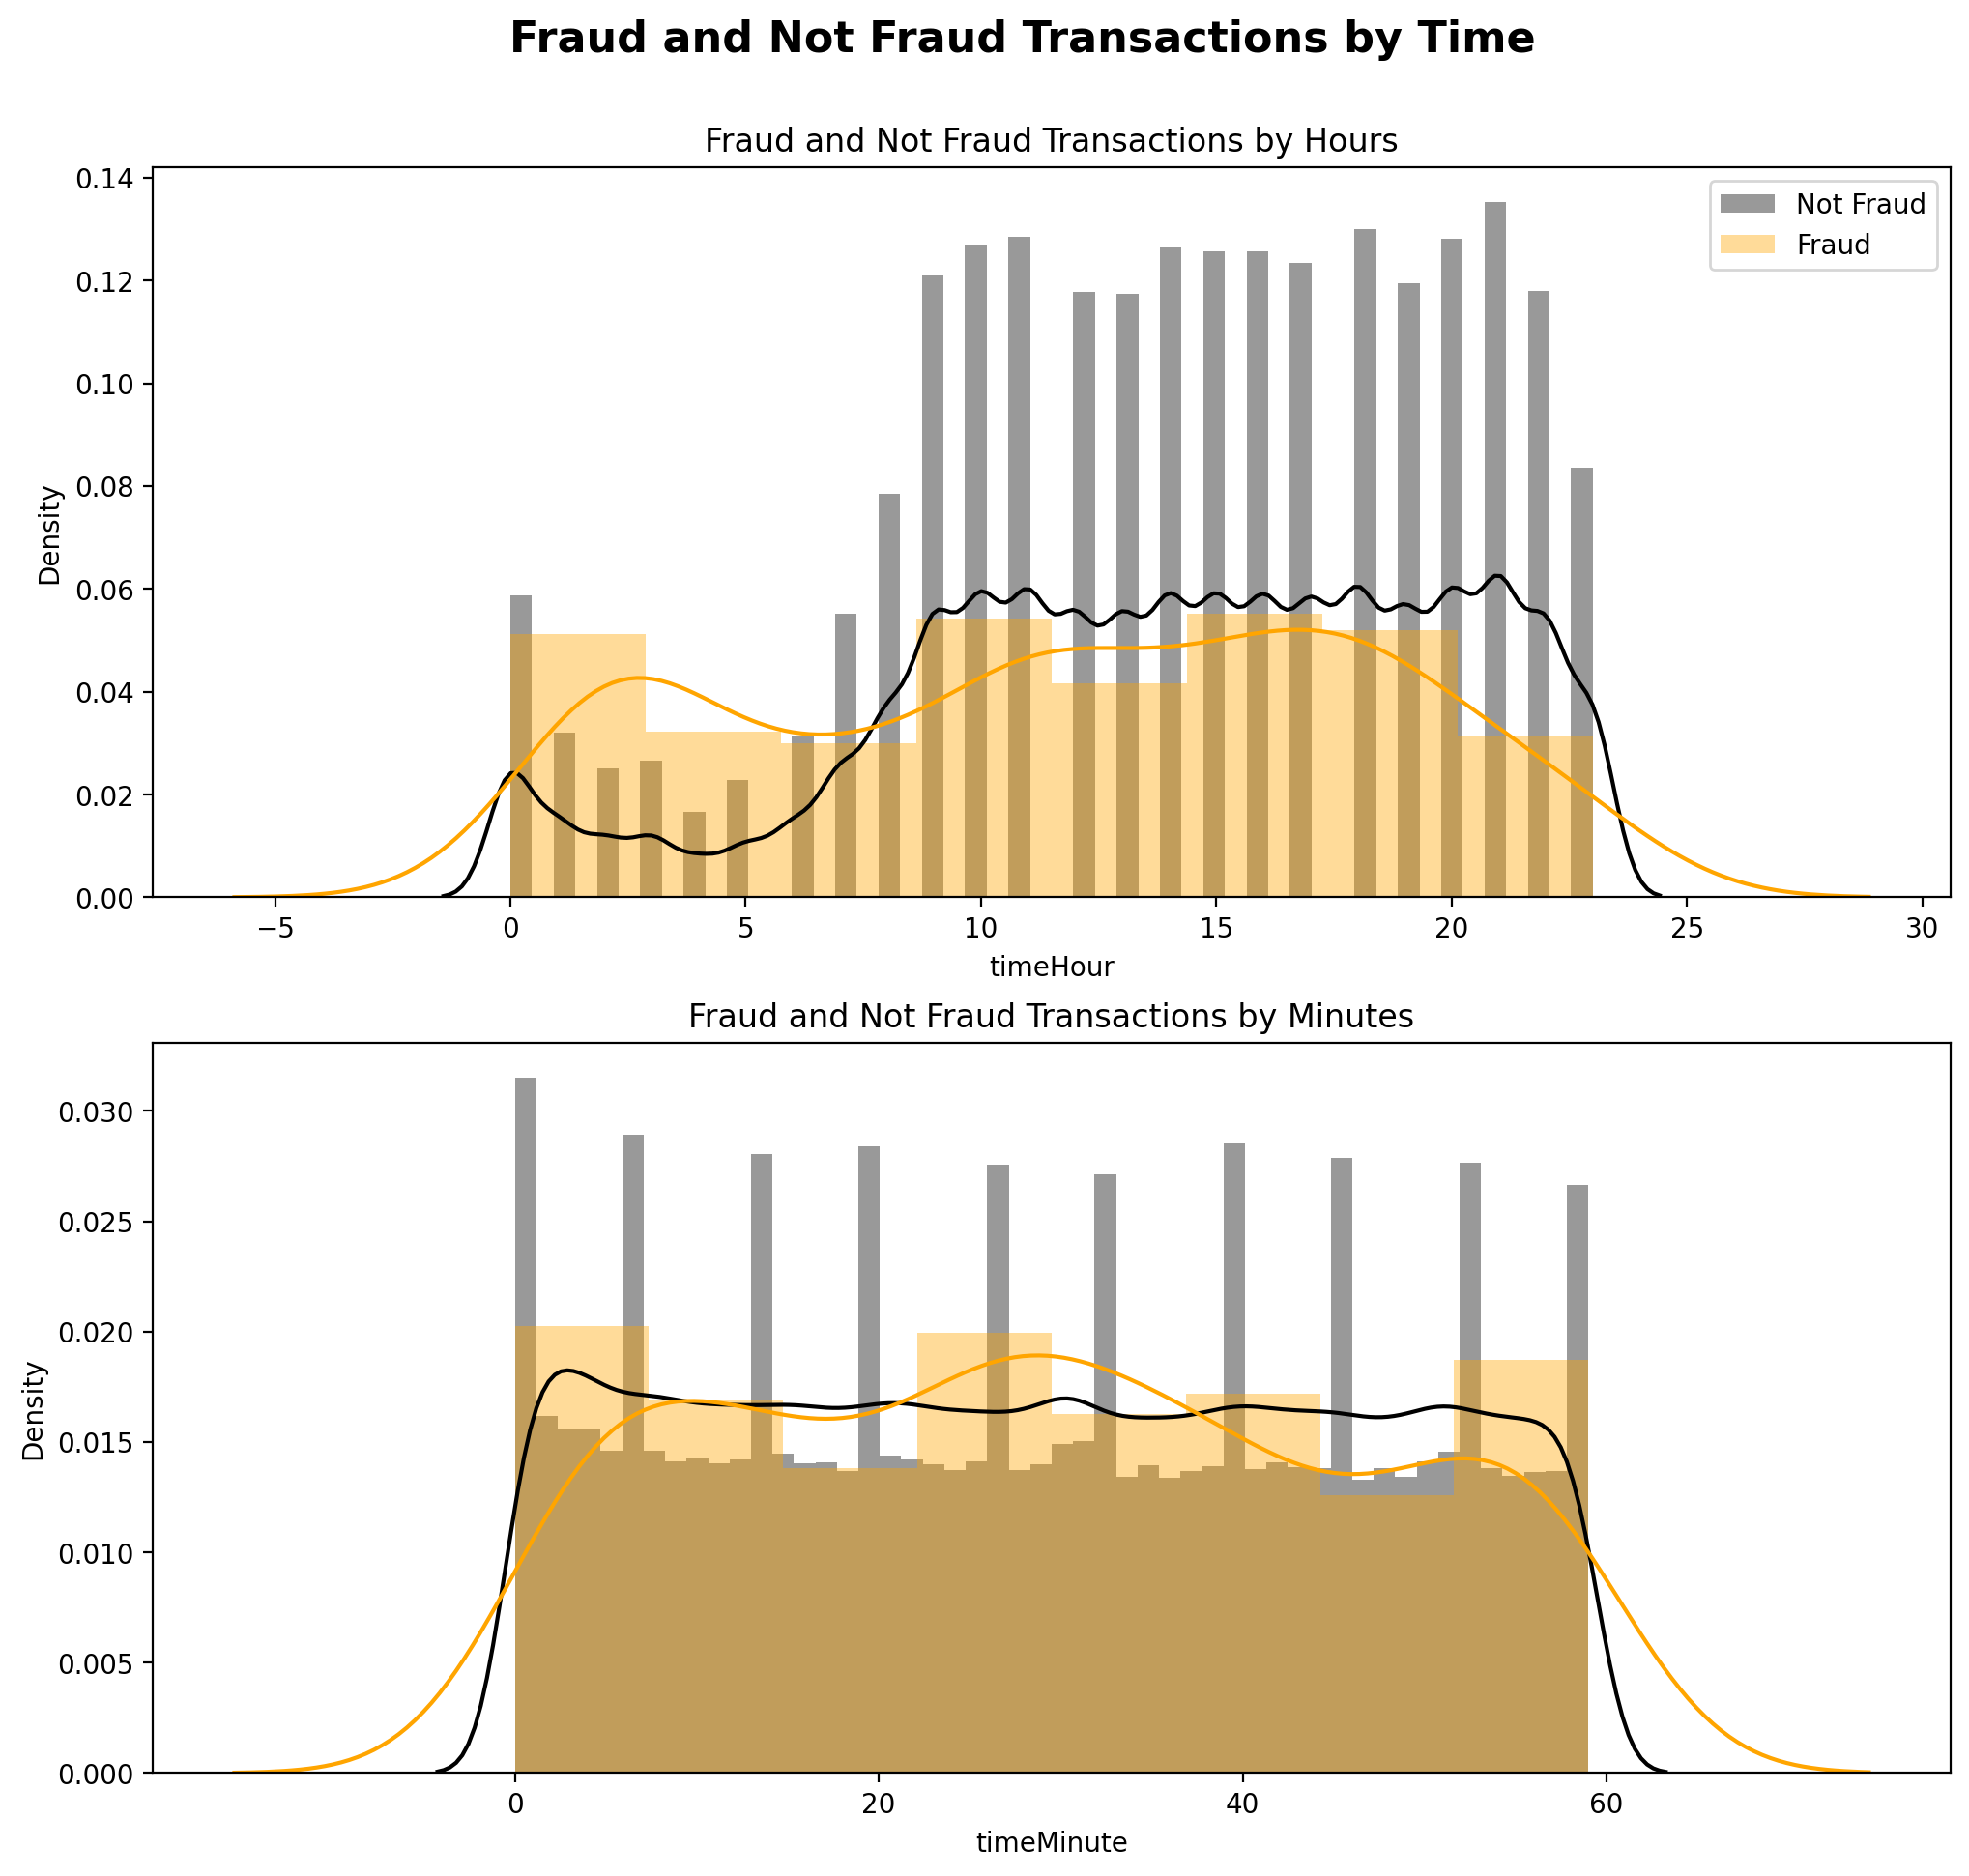

In [13]:
fig_time, ax_time = plt.subplots(2, figsize=(12, 11), dpi = 200)
fig_time.suptitle('Fraud and Not Fraud Transactions by Time', fontsize=16, fontweight='bold', y = 0.95)
ax_time[0].set_title('Fraud and Not Fraud Transactions by Hours', fontsize=12)
ax_time[1].set_title('Fraud and Not Fraud Transactions by Minutes', fontsize=12)

#By hour
sns.distplot(df_time[df_time['Class'] == 0]["timeHour"], ax=ax_time[0], color='k', label = 'Not Fraud');
sns.distplot(df_time[df_time['Class'] == 1]["timeHour"], ax=ax_time[0], color='orange', label = 'Fraud');
#By minute
sns.distplot(df_time[df_time['Class'] == 0]["timeMinute"], ax=ax_time[1],color='k');
sns.distplot(df_time[df_time['Class'] == 1]["timeMinute"], ax=ax_time[1],color='orange');
ax_time[0].legend()
plt.show()

However, we could not observe a clear pattern from the distributions above. Now we observe the distribution of cases by amount feature. First, we divide data into 2 data frames and observe the statistics of each class

In [14]:
df_notFraud =df[df['Class'] == 0]
df_isFraud = df[df['Class'] == 1]
print("Not Fraud group statistics:\n")
print(df_notFraud["Amount"].describe())
print("\nFraud group statistics:")
print(df_isFraud["Amount"].describe())

Not Fraud group statistics:

count    283417.000000
mean         88.376354
std         250.414748
min           0.000000
25%           5.660000
50%          22.000000
75%          77.090000
max       25691.160000
Name: Amount, dtype: float64

Fraud group statistics:
count     442.000000
mean      119.798710
std       250.677832
min         0.000000
25%         1.000000
50%        10.850000
75%       105.620000
max      2125.870000
Name: Amount, dtype: float64


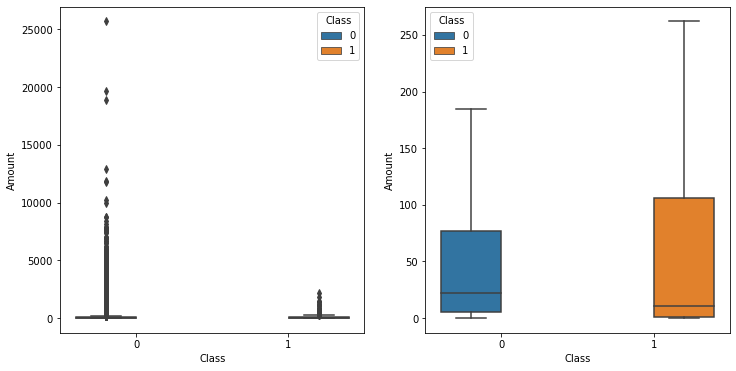

In [15]:
fig_amount, ax_amount = plt.subplots(ncols=2, figsize=(12, 6))
sns.boxplot(ax = ax_amount[0], x="Class", y="Amount", hue="Class",data=df,dodge = True, showfliers=True)
sns.boxplot(ax = ax_amount[1], x="Class", y="Amount", hue="Class",data=df,dodge = True,showfliers=False)
plt.show();

The `Not Fraud` transactions have a smaller mean and Q3; larger Q1 and Q2 and larger outliers. The IQR of fraudulent transactions are larger than normal transactions, but as was mentioned before normal transactions have larger values/amount transacted.

Next, we observe the amount transacted during consequentive 2 days and color each case by class to see the pattern. It is obvious that fraudulent transactions have significatly smaller amount transacted and they are almost at the same level.

<Figure size 3600x1800 with 0 Axes>

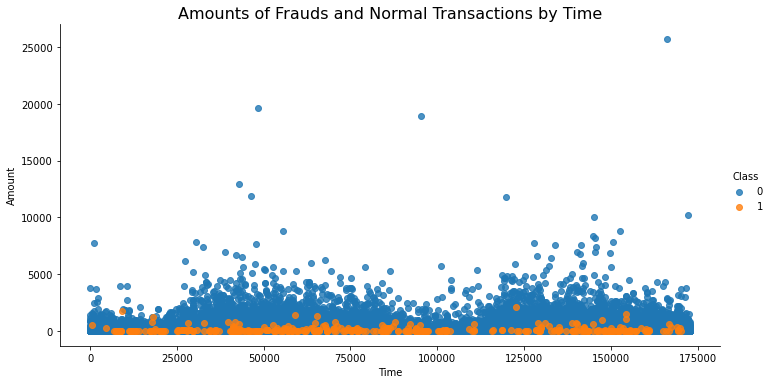

In [16]:
plt.figure(figsize=(12,6), dpi = 300);
sns.lmplot(y="Amount", x="Time",data=df, hue='Class', fit_reg=False, aspect = 2, scatter_kws={'alpha':0.8})
plt.title("Amounts of Frauds and Normal Transactions by Time",fontsize=16)
plt.show();

Now we use a Feature Density Plot to observe which features can clearly divide the groups/how separates the distributions for fraud and not fraud groups.

<Figure size 432x288 with 0 Axes>

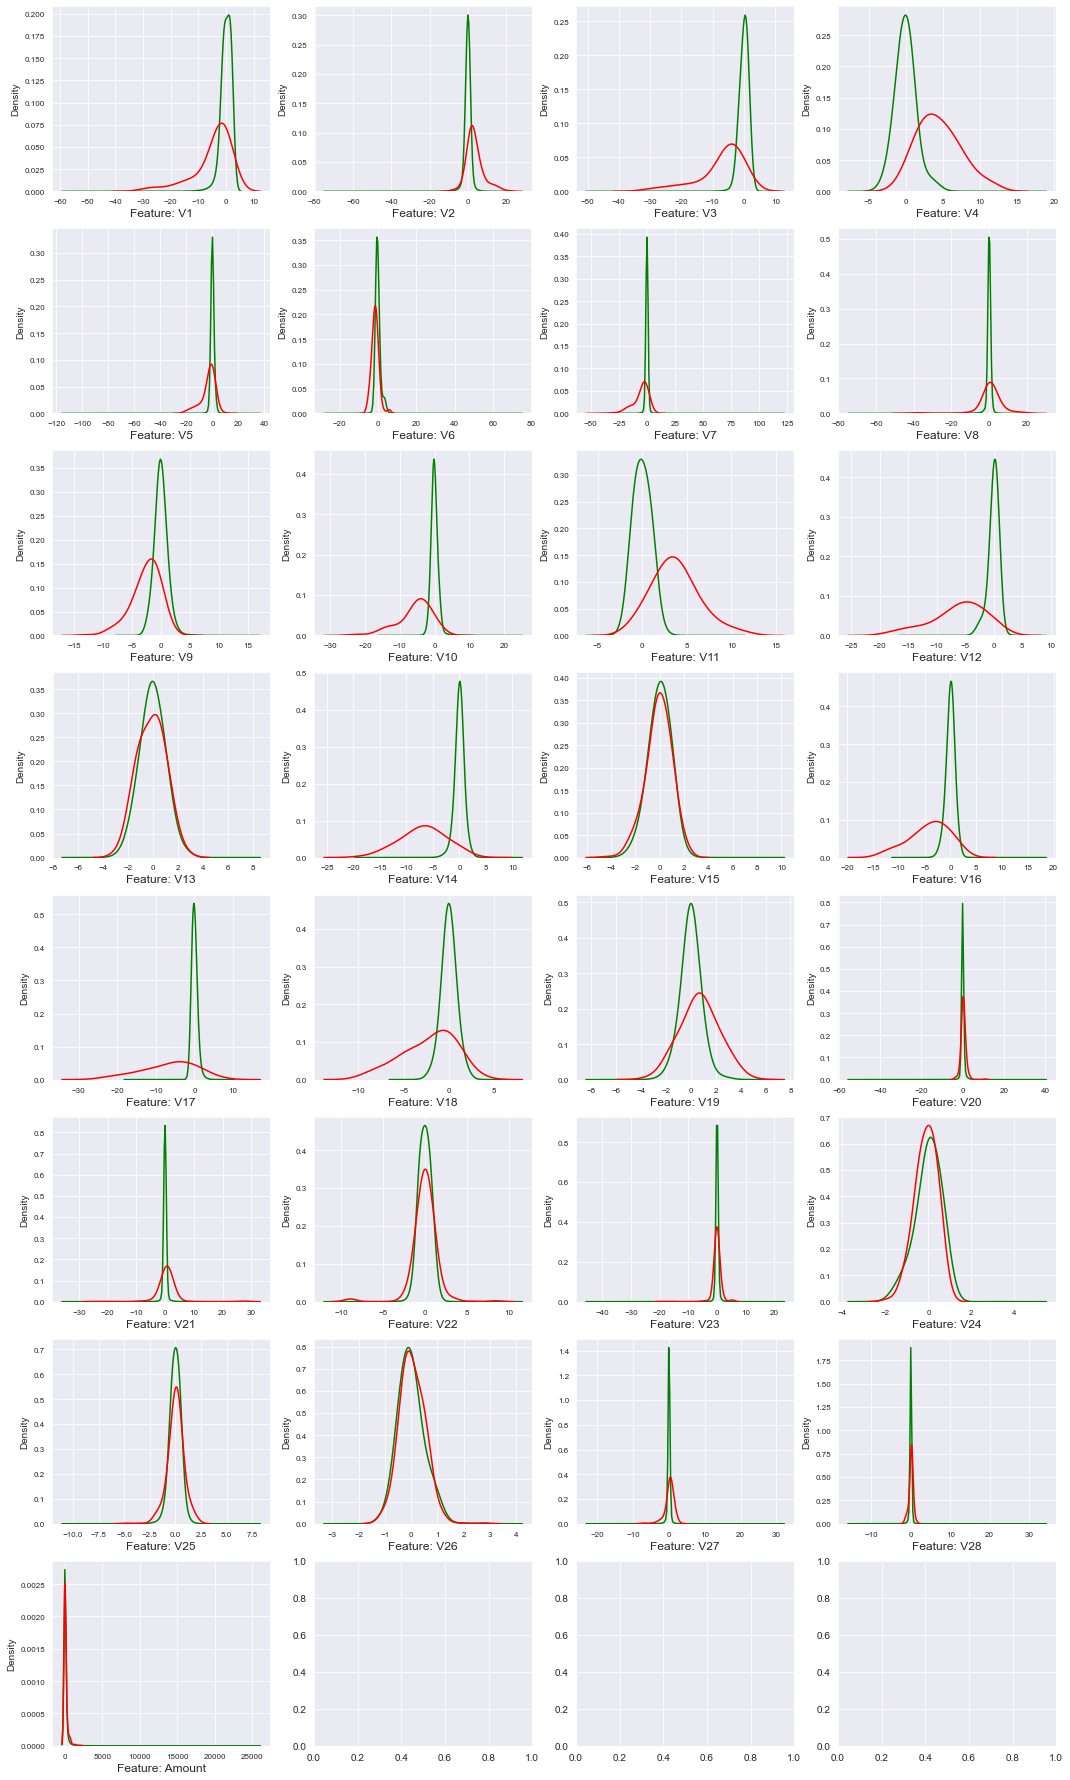

In [17]:
varis = df.columns.values
varis = varis[1:-1]
sns.set_style('darkgrid')
plt.figure()
fig_vars, ax_vars = plt.subplots(8,4,figsize=(18,32))
for i, variable in enumerate(df[varis]):
    plt.subplot(8,4,i+1)
    sns.kdeplot(df_notFraud[variable], bw=0.5,label="Class = 0", color = 'g')
    sns.kdeplot(df_isFraud[variable], bw=0.5,label="Class = 1", color = 'r')
    plt.xlabel('Feature: {}'.format(variable), fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=8)
plt.show();

The graphs above show that features V4, V11, V12 and V14 have clearly separated distributions for Fraud and Not Fraud groups, while V13, V15, V24, V25, V26, V28 and 'Amount' have similar distribution for groups

## Module 3: Dimension Reduction

We are using Principal Component Analysis (PCA) as our dimensionality reduction algorithm. Since PCA is effected by scale, we need to scale the features in our data before applying PCA. We use StandardScaler to help standardize the data.

Import the necessary packages for dimension reduction and standartization

In [18]:
from sklearn.preprocessing import StandardScaler

std_df_y = df_y
std_df_x = df_x
std_df_x = StandardScaler().fit_transform(std_df_x)
std_df_x.shape

(283859, 30)

The model components are:
 [[-2.77416862e-02 -1.71867601e-01 -3.91160116e-01 -1.44629622e-01
   7.55912905e-02 -2.90202793e-01  1.60279886e-01  2.93319181e-01
  -7.40062098e-02 -3.23770046e-02 -7.76309480e-02  7.01803994e-03
  -9.96213496e-03  5.83886322e-03  2.91658016e-02  3.10881178e-03
  -3.61906058e-03  8.34158404e-03  2.54369671e-02 -4.30965691e-02
   2.50589217e-01  7.70211228e-02 -5.08693490e-02 -8.38591280e-02
   5.67722488e-03 -2.78043913e-02 -1.59208550e-04  2.06147395e-02
   7.80414187e-03  7.05896823e-01]
 [ 7.05027527e-01  1.06570205e-01 -3.01990901e-02 -4.45516841e-01
  -1.11296355e-01  1.73577298e-01 -5.76445660e-02  9.91448515e-02
  -3.80916185e-02 -1.34726363e-02  1.63514100e-02 -2.45002173e-01
   1.34360827e-01 -6.18974762e-02 -1.01843660e-01 -1.94509903e-01
   1.27828756e-02 -8.07602526e-02  9.79529987e-02  2.96895162e-02
  -3.81819962e-02  5.31284124e-02  1.47553676e-01  5.09199710e-02
  -9.87837627e-03 -2.38449669e-01 -3.34980536e-02 -7.80598407e-03
  -6.23787994e

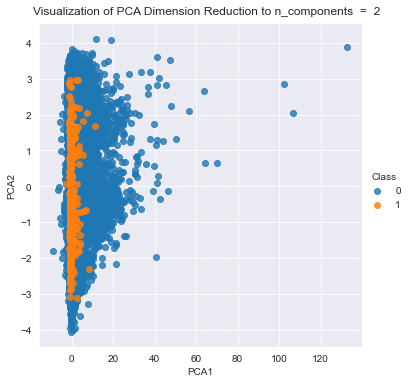

In [19]:
from sklearn.decomposition import PCA

model = PCA(n_components = 2)
model.fit(std_df_x)
print('The model components are:\n',model.components_,'\n')
print('The model explained variance is',model.explained_variance_,'\n')
print('The model explained variance ratio is',model.explained_variance_ratio_,'\n')
print("The variance is {} or about {}%".format(model.explained_variance_ratio_.sum(), model.explained_variance_ratio_.sum()*100))

x_2D = model.transform(std_df_x)
df['PCA1'] = x_2D[:,0]
df['PCA2'] = x_2D[:,1]
sns.lmplot(x = "PCA1",y = "PCA2",hue = 'Class',data = df,fit_reg = False)
plt.suptitle('Visualization of PCA Dimension Reduction to n_components  =  2',y = 1.02);

When setting n_components = 2, we found that the variance is too small (about 12%). In order to achieve 95% variance, we can set .95 for the number of components parameter. This will let scikit-learn choose the minimum number of principle components such that 95% of the variance is retained.

In [20]:
model = PCA(.95)
model.fit(std_df_x)
x_2D = model.transform(std_df_x)
df['PCA1'] = x_2D[:,0]
df['PCA2'] = x_2D[:,1]
print("The variance is {} or about {}%".format(model.explained_variance_ratio_.sum(), model.explained_variance_ratio_.sum()*100))

The variance is 0.9577638913562649 or about 95.77638913562649%


#### Summary
To speed up our machine learning algorithm, we use Principal Component Analysis (PCA) as one of the unsupervised learning methods. Before doing dimension reduction, we standardize the data using StandardScaler. We set n_components = 2 and then we plot the 2D projection. We found that the variance is too small if we were to set n_components to 2. Because we want to achieve 95% variance, we set .95 for the number of components parameter. Finally, we finished dimensionality reduction using PCA with a variance of 95%.

## Module 4: Classification

Due the highly unbalanced dataset, first, we perform undersampling in order to make the size of the fraud transaction and non-fraud transactions equal.

In [21]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=0)
training_x, training_y = sampler.fit_resample(df_x,df_y)
print(training_y.value_counts())

Class
0        442
1        442
dtype: int64


Load test dataset from `creditcard_test.csv`

In [22]:
df2 = pd.read_csv('creditcard_test.csv')
test_y = pd.DataFrame(df2['Class'])
test_x = df2.drop(columns=['Class'])

#### Model Training & Testing

The models chosen are Gaussian NB, Decision Tree Clasifier, and Logistic Regression. Each models will go through the following steps:
- The models are trained by the training dataset and tested to the test dataset
- Count the accuracy scores
- Plot confusion matrix for visualization
- 5-Fold Cross Validation which takes different parts of the training dataset and divide it into two parts, a larger training dataset and a test dataset from the training dataset (cross-validation method)

After we do all three methods, the scores are used to determine which of the model is the best

#### Import the classification methods, and packages for metrics and cross-validation

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score

##### Classification method 1: Gaussian NB

The accuracy score for the model is 0.92 or 92.0%


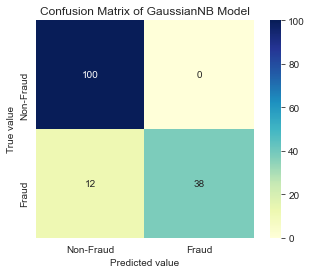

In [24]:
model = GaussianNB().fit(training_x,training_y.values.ravel())
model_y = model.predict(test_x)

print('The accuracy score for the model is {} or {}%'.format(accuracy_score(test_y,model_y), accuracy_score(test_y,model_y)*100))

labels= ['Non-Fraud', 'Fraud'] 
mat = confusion_matrix(test_y,model_y)
sns.heatmap(mat, xticklabels= labels, yticklabels= labels,square=True, annot=True, cbar=True,fmt='',cmap='YlGnBu')
plt.title("Confusion Matrix of GaussianNB Model")
plt.xlabel('Predicted value')
plt.ylabel('True value');

5-Fold Cross Validation

In [25]:
crossval_gnb = cross_val_score(GaussianNB(),training_x,y=training_y.values.ravel(),cv=5)

print('Each of the cross-validation results are {} which also means {} in percentage form'.format(crossval_gnb, crossval_gnb*100))
print('The average cross-validation score is {} or {}%'.format(crossval_gnb.mean(), crossval_gnb.mean()*100))

Each of the cross-validation results are [0.92090395 0.85875706 0.76271186 0.9039548  0.80681818] which also means [92.09039548 85.87570621 76.27118644 90.39548023 80.68181818] in percentage form
The average cross-validation score is 0.8506291730868002 or 85.06291730868001%


##### Classification method 2: Decision Tree Classifier

The accuracy score for the model is 0.8866666666666667 or 88.66666666666667%


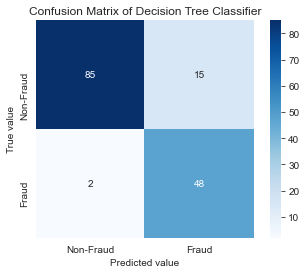

In [26]:
tree = DecisionTreeClassifier().fit(training_x,training_y)
pred_y = tree.predict(test_x)

print('The accuracy score for the model is {} or {}%'.format(accuracy_score(test_y,pred_y), accuracy_score(test_y,pred_y)*100))

labels= ['Non-Fraud', 'Fraud'] 
mat = confusion_matrix(test_y,pred_y)
sns.heatmap(mat, xticklabels= labels, yticklabels= labels,square=True, annot=True, cbar=True,fmt='',cmap='Blues')
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.xlabel('Predicted value')
plt.ylabel('True value');

5-Fold Cross Validation

In [27]:
crossval_dtc = cross_val_score(DecisionTreeClassifier(),training_x,y=training_y.values.ravel(),cv=5)

print('Each of the cross-validation results are {} which also means {} in percentage form'.format(crossval_dtc, crossval_dtc*100))
print('The average cross-validation score is {} or {}%'.format(crossval_dtc.mean(), crossval_dtc.mean()*100))

Each of the cross-validation results are [0.54237288 0.85875706 0.88135593 0.87570621 0.86931818] which also means [54.23728814 85.87570621 88.13559322 87.57062147 86.93181818] in percentage form
The average cross-validation score is 0.8055020544427324 or 80.55020544427323%


##### Classification method 3: Logistic Regression

The accuracy score for the model is 0.8933333333333333 or 89.33333333333333%


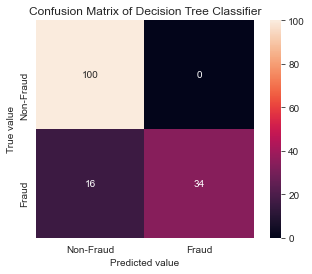

In [28]:
model = LogisticRegression(max_iter=1000).fit(df_x,df_y.values.ravel())
pred_y = model.predict(test_x)

print('The accuracy score for the model is {} or {}%'.format(accuracy_score(test_y,pred_y), accuracy_score(test_y,pred_y)*100))

labels = ['Non-Fraud', 'Fraud'] 
mat = confusion_matrix(test_y,pred_y)
sns.heatmap(mat, xticklabels= labels, yticklabels= labels,square=True, annot=True, cbar=True,fmt='')
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.xlabel('Predicted value')
plt.ylabel('True value');

5-Fold Cross Validation

In [29]:
crossval_LR=cross_val_score(LogisticRegression(max_iter=1000),training_x,y=training_y.values.ravel(),cv=5)

print('Each of the cross-validation results are {} which also means {} in percentage form'.format(crossval_LR, crossval_LR*100))
print('The average cross-validation score is {} or {}%'.format(crossval_LR.mean(), crossval_LR.mean()*100))

Each of the cross-validation results are [0.91525424 0.93220339 0.9039548  0.89830508 0.875     ] which also means [91.52542373 93.22033898 90.39548023 89.83050847 87.5       ] in percentage form
The average cross-validation score is 0.9049435028248588 or 90.49435028248588%


The results from the three models are as the following:
- Gaussian NB: 92% accuracy and 85% average cross-validation score
- Decision Tree Classifier: 88% accuracy and 80% average cross-validation score
- Logistic Regression: 89% accuracy and 90% average cross-validation score

Overall, the models chosen are a good decision, with more than 80% accuracy. From the accuracy scores result, we can observe that the Logistic Regression model is the best among the three.

## Module 5: Summary

The project investigates the dataset of fraud and normal credit transactions. We start by exploring the dataset, working with missing values and outliers. We decided to drop the rows that have null values and kept the outliers because the dataset is already highly unbalanced. Removing the outliers would make the dataset even more biased.  The head of the finalised dataset (dataset after data exploration) is shown below:

In [30]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,PCA1,PCA2
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.406140,-2.539212
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.399129,-2.067895
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.859110,-2.550077
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.307590,-1.781325
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.011767,-1.482175


Next, in Module 2 we observe how the data is highly unbalanced with several visualizations regarding the features, the distributions of the features, and consider the relationship between different features. Then in Module 3 we applied unsupervised learning methods, PCA (Principal component analysis) as our dimensionality reduction method to minimize the number of variables. We needed to achieve a variance of 95% so we did the following code:

In [31]:
model = PCA(.95)
model.fit(std_df_x)
x_2D = model.transform(std_df_x)
df['PCA1'] = x_2D[:,0]
df['PCA2'] = x_2D[:,1]
print("The variance is {} or about {}%".format(model.explained_variance_ratio_.sum(), model.explained_variance_ratio_.sum()*100))

The variance is 0.9577638913562649 or about 95.77638913562649%


In module 4, we use the dataset to train different models which are Gaussian NB, Decision Tree Clasifier, and Logistic Regression. We prepared both data for training and testing. For each model, we count the accuracy scores, plot a confusion matrix, and 5-Fold Cross Validation.

We began with the Gaussian NB model, for which we obtained an accuracy of 92% and 85% average cross-validation score.  
Next we investigated the Decission Tree Classifier, for which we obtained an accuracy of 88% and 80% average cross-validation score.   
Lastly, we investigated the Logistic Regression model, for which we obtained an accuracy of 89% and 90% average cross-validation score.  

We conclude that the Logistic Regression model is the best among the three.

The accuracy score for the model is 0.8933333333333333 or 89.33333333333333%
The average cross-validation score is 0.9049435028248588 or 90.49435028248588%


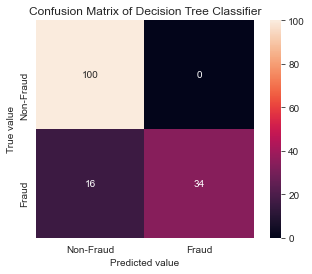

In [32]:
model = LogisticRegression(max_iter=1000).fit(df_x,df_y.values.ravel())
pred_y = model.predict(test_x)

print('The accuracy score for the model is {} or {}%'.format(accuracy_score(test_y,pred_y), accuracy_score(test_y,pred_y)*100))

labels = ['Non-Fraud', 'Fraud'] 
mat = confusion_matrix(test_y,pred_y)
sns.heatmap(mat, xticklabels= labels, yticklabels= labels,square=True, annot=True, cbar=True,fmt='')
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.xlabel('Predicted value')
plt.ylabel('True value');

crossval_LR=cross_val_score(LogisticRegression(max_iter=1000),training_x,y=training_y.values.ravel(),cv=5)
print('The average cross-validation score is {} or {}%'.format(crossval_LR.mean(), crossval_LR.mean()*100))